In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings 
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('heart.csv')

In [3]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [5]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [6]:
data.shape

(918, 12)

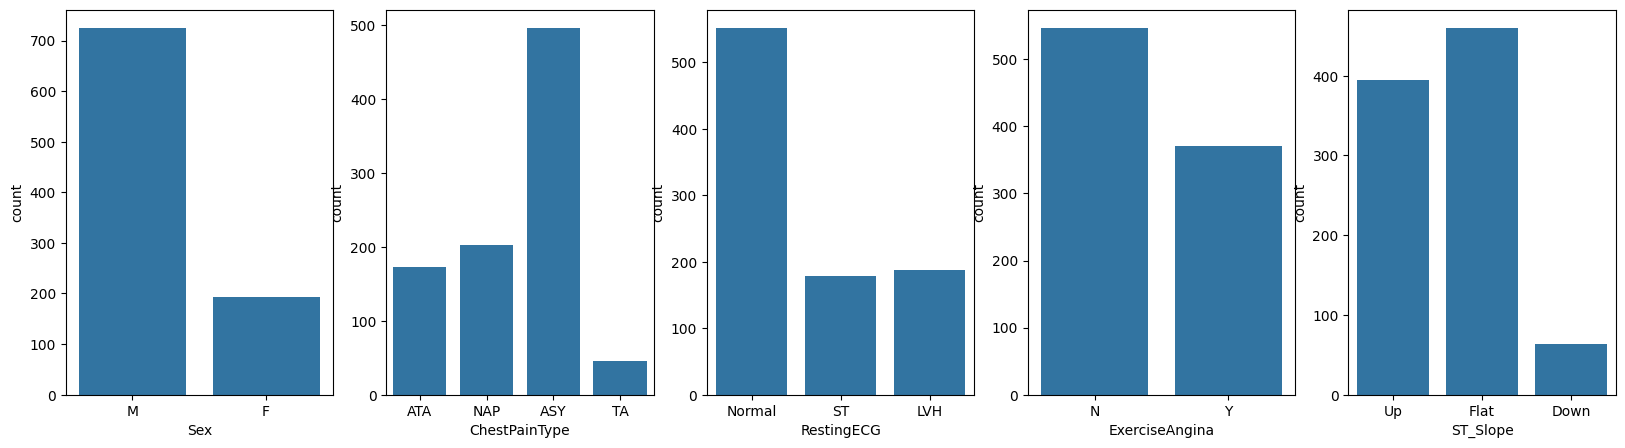

In [7]:
cat=['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']
plt.figure(figsize=(20,5))
for i in range(5):
  plt.subplot(1,5,i+1)
  sns.countplot(x=cat[i],data=data)

In [8]:
data[data.HeartDisease == 1]['Sex'].value_counts()

Sex
M    458
F     50
Name: count, dtype: int64

In [9]:
data.duplicated().sum()

0

In [10]:
for col in data.columns:
    print('Unique values of ' + col)
    print(data[col].unique())
    print("======================")

Unique values of Age
[40 49 37 48 54 39 45 58 42 38 43 60 36 44 53 52 51 56 41 32 65 35 59 50
 47 31 46 57 55 63 66 34 33 61 29 62 28 30 74 68 72 64 69 67 73 70 77 75
 76 71]
Unique values of Sex
['M' 'F']
Unique values of ChestPainType
['ATA' 'NAP' 'ASY' 'TA']
Unique values of RestingBP
[140 160 130 138 150 120 110 136 115 100 124 113 125 145 112 132 118 170
 142 190 135 180 108 155 128 106  92 200 122  98 105 133  95  80 137 185
 165 126 152 116   0 144 154 134 104 139 131 141 178 146 158 123 102  96
 143 172 156 114 127 101 174  94 148 117 192 129 164]
Unique values of Cholesterol
[289 180 283 214 195 339 237 208 207 284 211 164 204 234 273 196 201 248
 267 223 184 288 215 209 260 468 188 518 167 224 172 186 254 306 250 177
 227 230 294 264 259 175 318 216 340 233 205 245 194 270 213 365 342 253
 277 202 297 225 246 412 265 182 218 268 163 529 100 206 238 139 263 291
 229 307 210 329 147  85 269 275 179 392 466 129 241 255 276 282 338 160
 156 272 240 393 161 228 292 388 166 247 331

In [11]:
data.head(1)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0


In [12]:
data['Sex'].replace(['M','F'],[0,1],inplace = True)

In [13]:
data['ChestPainType'].replace(['ATA','NAP','ASY','TA'],[0,1,2,3],inplace = True)

In [14]:
data['RestingECG'].replace(['Normal','ST','LVH'],[0,1,2],inplace = True)

In [15]:
data['ExerciseAngina'].replace(['N' ,'Y'],[0,1],inplace = True)

In [16]:
data['ST_Slope'].replace(['Up','Flat','Down'],[0,1,2],inplace = True)

In [17]:
data.sample(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
781,50,1,2,110,254,0,2,159,0,0.0,0,0
144,56,1,0,120,279,0,0,150,0,1.0,1,1
473,60,0,1,141,316,1,1,122,1,1.7,1,1
372,63,0,2,185,0,0,0,98,1,0.0,0,1
844,52,0,3,118,186,0,2,190,0,0.0,1,0


In [18]:
X=data.drop('HeartDisease', axis=1)
y=data['HeartDisease']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1, random_state = 1)

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
print('Logistic Regression')
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

Logistic Regression


LogisticRegression()

In [21]:
from sklearn.metrics import accuracy_score
y_pred_log_reg = log_reg.predict(X_test)

print('Logistic Regression')
print('--'*25)
log_reg_accuracy = round(accuracy_score(y_test,y_pred_log_reg) *100,2)
print('Accuracy', log_reg_accuracy,'%')

Logistic Regression
--------------------------------------------------
Accuracy 92.39 %


In [23]:
y_pred_log_reg

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1], dtype=int64)

In [24]:
input_data_model = pd.DataFrame(
    [[34,1,3,120,235,1,2,183,1,3.2,2]],
columns = ['Age','Sex','ChestPainType','RestingBP','Cholesterol','FastingBS','RestingECG','MaxHR','ExerciseAngina','Oldpeak','ST_Slope'])

In [25]:
input_data_model

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,34,1,3,120,235,1,2,183,1,3.2,2


In [26]:
log_reg.predict(input_data_model)

array([1], dtype=int64)

In [27]:
import pickle as pk

In [28]:
pk.dump(log_reg,open('model.pkl','wb'))